# Clasificador Bayesiano

Este notebook implementa un **clasificador bayesiano manual** para predecir si una persona camina o conduce basándose en su edad e ingreso.

## Objetivo del Proyecto
Implementar manualmente desde cero un clasificador basado en el Teorema de Bayes General para entender cómo funciona la clasificación probabilística.

**Restricciones:**  no esta permitido el uso de clases externas como SciKitLearn, MGPy, PyMC, Keras, TensorFlow, etc. Todo será implementación manual.

## Dataset
- **100 instancias** con edad (18-75 años) e ingreso ($10,000-$60,000)
- **Clases**: "Camina" o "Conduce"
- **Objetivo**: Predecir el medio de transporte basado en características demográficas

## 1. Importar Librerías Necesarias

Importamos las librerías básicas permitidas para el análisis y visualización de datos:

In [1]:
# Importar librerías básicas para análisis de datos
import pandas as pd             # Manejo de datos
import numpy as np              # Cálculos numéricos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns           # Visualización estadística

# Configurar visualización (Planos)
plt.style.use('default')
sns.set_palette("bright")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Librerías importadas correctamente")

Librerías importadas correctamente


# =================================================================================

## 2. Cargar y Explorar los datos de la Dataset

Importamos y Cargamos el dataset y revisamos el contenido para entender la estructura de los datos:

In [2]:
# Cargar el dataset desde CSV
# Ruta del dataset
df = pd.read_csv('data/dataset_walk_drive_publicado.csv')

print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Número de instancias: {df.shape[0]}")
print(f"Número de características: {df.shape[1]}")

print("\n=== PRIMERAS 10 FILAS ===")
print(df.head(10))

=== INFORMACIÓN BÁSICA DEL DATASET ===
Forma del dataset: (100, 3)
Número de instancias: 100
Número de características: 3

=== PRIMERAS 10 FILAS ===
   Edad  Ingreso    Clase
0    57    32961  Conduce
1    29    32610   Camina
2    25    30051   Camina
3    54    27654  Conduce
4    58    15846  Conduce
5    25    25793   Camina
6    41    26572  Conduce
7    23    21977   Camina
8    69    28387  Conduce
9    36    34040  Conduce


In [3]:
# Análisis exploratorio básico
print("=== ESTADISTICAS DESCRIPTIVAS ===")
# describe estadísticas básicas de las columnas numéricas
print(df.describe())

print("\n=== INFORMACIÓN SOBRE VALORES FALTANTES ===")
print(f"Valores nulos por columna:")
# isnull() = Detecta valores nulos
# sum() = Suma los valores nulos por columna
print(df.isnull().sum())

print("\n=== DISTRIBUCIÓN DE CLASES ===")
conteo_clases = df['Clase'].value_counts()
print(conteo_clases)

print("\n=== PROPORCIÓN DE CLASES ===")
proporciones = df['Clase'].value_counts(normalize=True)
print(proporciones.round(4))

=== ESTADISTICAS DESCRIPTIVAS ===
             Edad       Ingreso
count  100.000000    100.000000
mean    42.520000  30436.780000
std     16.936292   9427.696472
min     18.000000  10812.000000
25%     27.000000  22388.250000
50%     42.000000  31363.500000
75%     57.000000  35381.250000
max     74.000000  57201.000000

=== INFORMACIÓN SOBRE VALORES FALTANTES ===
Valores nulos por columna:
Edad       0
Ingreso    0
Clase      0
dtype: int64

=== DISTRIBUCIÓN DE CLASES ===
Clase
Conduce    64
Camina     36
Name: count, dtype: int64

=== PROPORCIÓN DE CLASES ===
Clase
Conduce    0.64
Camina     0.36
Name: proportion, dtype: float64
             Edad       Ingreso
count  100.000000    100.000000
mean    42.520000  30436.780000
std     16.936292   9427.696472
min     18.000000  10812.000000
25%     27.000000  22388.250000
50%     42.000000  31363.500000
75%     57.000000  35381.250000
max     74.000000  57201.000000

=== INFORMACIÓN SOBRE VALORES FALTANTES ===
Valores nulos por columna:
E

# =================================================================================


## 3. Visualización de los Datos
### Sin discretizar

Creamos gráficos para entender visualmente las distribuciones y relaciones en los datos:

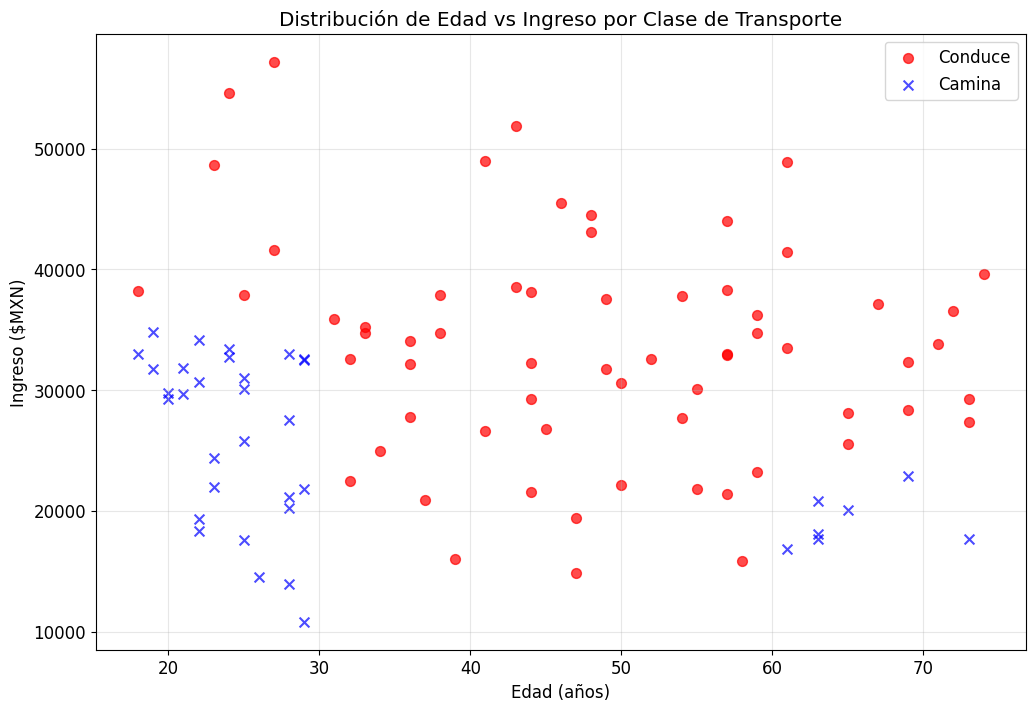

Este grafico se muestra la distribucion de las personas que caminan vs conducen
según su edad e ingreso.


In [4]:
# Gráfico de dispersión: Edad vs Ingreso por Clase
plt.figure(figsize=(12, 8))

# figuras diferentes por clase
marcadores = {'Camina': 'x', 'Conduce': 'o'}
colores = {'Camina': 'blue', 'Conduce': 'red'}

# Crear plano diferenciando por clase
for clase in df['Clase'].unique():
    datos_clase = df[df['Clase'] == clase]
    plt.scatter(
        datos_clase['Edad'],
        datos_clase['Ingreso'],
        label=clase,
        alpha=0.7,
        s=50,
        marker=marcadores[clase],
        color=colores[clase]
    )

plt.xlabel('Edad (años)')
plt.ylabel('Ingreso ($MXN)')
plt.title('Distribución de Edad vs Ingreso por Clase de Transporte')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Este grafico se muestra la distribucion de las personas que caminan vs conducen")
print("según su edad e ingreso.")

## Grafico de Histograma de Edad e Ingreso por Clase de Transporte (Box-Plot)

In [5]:
# # Histogramas para visualizar distribuciones
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# # Distribución de Edad por Clase
# axes[0,0].hist([df[df['Clase']=='Camina']['Edad'], df[df['Clase']=='Conduce']['Edad']], 
#                bins=15, alpha=0.7, label=['Camina', 'Conduce'], color=['skyblue', 'lightcoral'])
# axes[0,0].set_xlabel('Edad')
# axes[0,0].set_ylabel('Frecuencia')
# axes[0,0].set_title('Distribución de Edad por Clase')
# axes[0,0].legend()

# # Distribución de Ingreso por Clase
# axes[0,1].hist([df[df['Clase']=='Camina']['Ingreso'], df[df['Clase']=='Conduce']['Ingreso']], 
#                bins=15, alpha=0.7, label=['Camina', 'Conduce'], color=['skyblue', 'lightcoral'])
# axes[0,1].set_xlabel('Ingreso')
# axes[0,1].set_ylabel('Frecuencia')
# axes[0,1].set_title('Distribución de Ingreso por Clase')
# axes[0,1].legend()

# # Boxplot de Edad por Clase
# df.boxplot(column='Edad', by='Clase', ax=axes[1,0])
# axes[1,0].set_title('Boxplot: Edad por Clase')
# axes[1,0].set_xlabel('Clase')

# # Boxplot de Ingreso por Clase
# df.boxplot(column='Ingreso', by='Clase', ax=axes[1,1])
# axes[1,1].set_title('Boxplot: Ingreso por Clase')
# axes[1,1].set_xlabel('Clase')

# plt.tight_layout()
# plt.show()

# =================================================================================

## 4. Preprocesamiento del dataset:
### Discretización (Binning)

Ahora vamos a discretizar las variables **Edad** e **Ingreso** en intervalos para hacer las categorías.

### ¿Por qué discretizar?
Es un proceso que requiere el clasificador bayesiano, donde su proceso es convertir variables numéricas continuas en variables categóricas o discretas (poner un rango).
- Las variables continuas tienen infinitos valores posibles
- Para el clasificador bayesiano necesitamos contar frecuencias
- Al agrupar en "bins" podemos calcular probabilidades más fácilmente

### Bins de Edad
| Categoría | Rango de años | Bin |
|-----------|:-------------:|:---:|
| Joven     | 18-29         | 0   |
|-----------|--------------|-----|
| Adulto    | 30-59         | 1   |
|-----------|--------------|-----|
| Mayor     | 60-75         | 2   |

### Bins de Ingreso
| Categoría | Rango de ingreso ($MXN) | Bin |
|-----------|:----------------------:|:---:|
| Muy bajo  | 10,000-19,999          | 0   |
|-----------|------------------------|-----|
| Bajo      | 20,000-29,999          | 1   |
|-----------|------------------------|-----|
| Medio     | 30,000-39,999          | 2   |
|-----------|------------------------|-----|
| Alto      | 40,000-49,999          | 3   |
|-----------|------------------------|-----|
| Muy alto  | 50,000-60,000          | 4   |
|-----------|------------------------|-----|


In [17]:
# Importar el módulo de preprocesamiento
import sys
sys.path.append('src')
from models.datos_preprocesados import PreprocesamientoDatos

# Crear instancia del preprocesador
preprocesador = PreprocesamientoDatos()

# Mostrar información de los bins que vamos a usar
print("=== CONFIGURACIÓN DE BINS ===")
info_bins = preprocesador.obtener_descripcion_bins()

print("\nBins para EDAD:")
for i, nombre in enumerate(info_bins['edad']['nombres']):
    print(f"  Bin {i}: {nombre}")

print("\nBins para INGRESO:")
for i, nombre in enumerate(info_bins['ingreso']['nombres']):
    print(f"  Bin {i}: {nombre}")


=== CONFIGURACIÓN DE BINS ===

Bins para EDAD:
  Bin 0: Joven (18-29)
  Bin 1: Adulto (30-59)
  Bin 2: Mayor (60-75)

Bins para INGRESO:
  Bin 0: Muy bajo (10k-19,999k)
  Bin 1: Bajo (20k-29,999k)
  Bin 2: Medio (30k-39,999k)
  Bin 3: Alto (40k-49,999k)
  Bin 4: Muy alto (50k-60k)


In [18]:
# Aplicar el binning al dataset
print("=== APLICANDO DISCRETIZACIÓN ===")
df_procesado = preprocesador.aplicar_binning(df)

print(f"Dataset original: {df.shape}")
print(f"Dataset procesado: {df_procesado.shape}")

print("\n=== PRIMERAS 10 FILAS CON BINNING ===")
print(df_procesado[['Edad', 'Edad_bin', 'Ingreso', 'Ingreso_bin', 'Clase']].head(10))

# Mostrar estadísticas del binning
preprocesador.mostrar_estadisticas_binning(df, df_procesado)

=== APLICANDO DISCRETIZACIÓN ===
Dataset original: (100, 3)
Dataset procesado: (100, 5)

=== PRIMERAS 10 FILAS CON BINNING ===
   Edad  Edad_bin  Ingreso  Ingreso_bin    Clase
0    57         1    32961            2  Conduce
1    29         0    32610            2   Camina
2    25         0    30051            2   Camina
3    54         1    27654            1  Conduce
4    58         1    15846            0  Conduce
5    25         0    25793            1   Camina
6    41         1    26572            1  Conduce
7    23         0    21977            1   Camina
8    69         2    28387            1  Conduce
9    36         1    34040            2  Conduce
=== ESTADÍSTICAS DEL BINNING ===

--- DISTRIBUCIÓN POR BINS DE EDAD ---
Bin 0 - Joven (18-29): 35 personas (35.0%)
Bin 1 - Adulto (30-59): 45 personas (45.0%)
Bin 2 - Mayor (60-75): 20 personas (20.0%)

--- DISTRIBUCIÓN POR BINS DE INGRESO ---
Bin 0 - Muy bajo (10k-19,999k): 14 personas (14.0%)
Bin 1 - Bajo (20k-29,999k): 31 persona

## Graficos de la Discretización de Edad e Ingreso

A continuacion se muestra los graficos con los datos ya preprocesados. o discretizados.

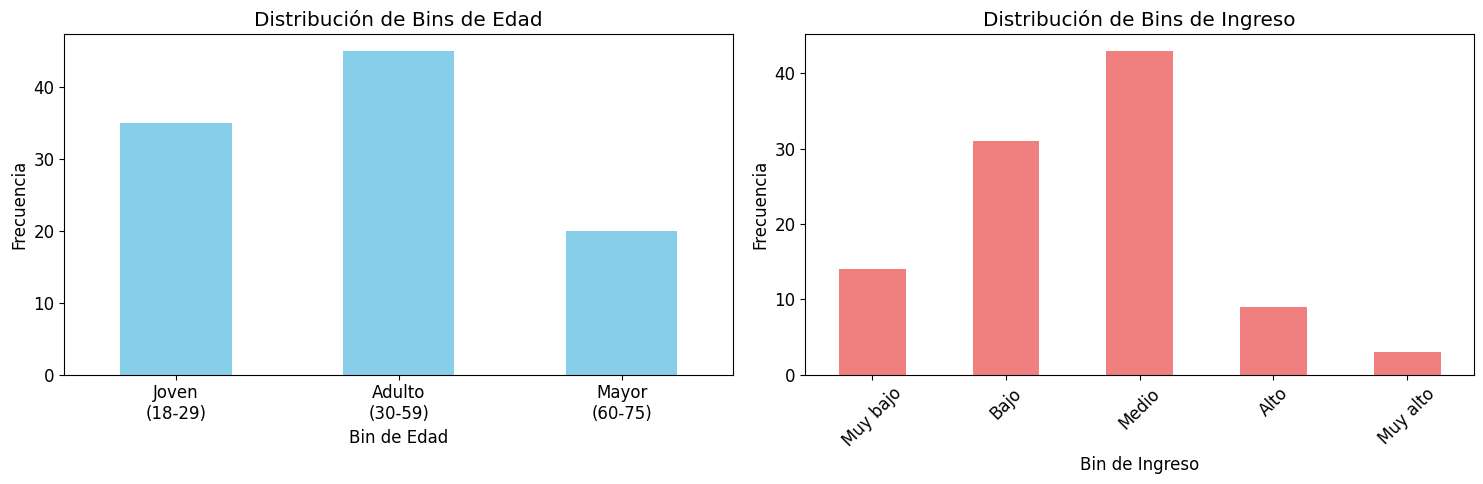

In [ ]:
# Visualización de la discretización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de bins de edad
df_procesado['Edad_bin'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Bins de Edad')
axes[0].set_xlabel('Bin de Edad')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Joven\n(18-29)', 'Adulto\n(30-59)', 'Mayor\n(60-75)'], rotation=0)

# Distribución de bins de ingreso
df_procesado['Ingreso_bin'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Distribución de Bins de Ingreso')
axes[1].set_xlabel('Bin de Ingreso')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticklabels(['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'], rotation=45)

plt.tight_layout()
plt.show()

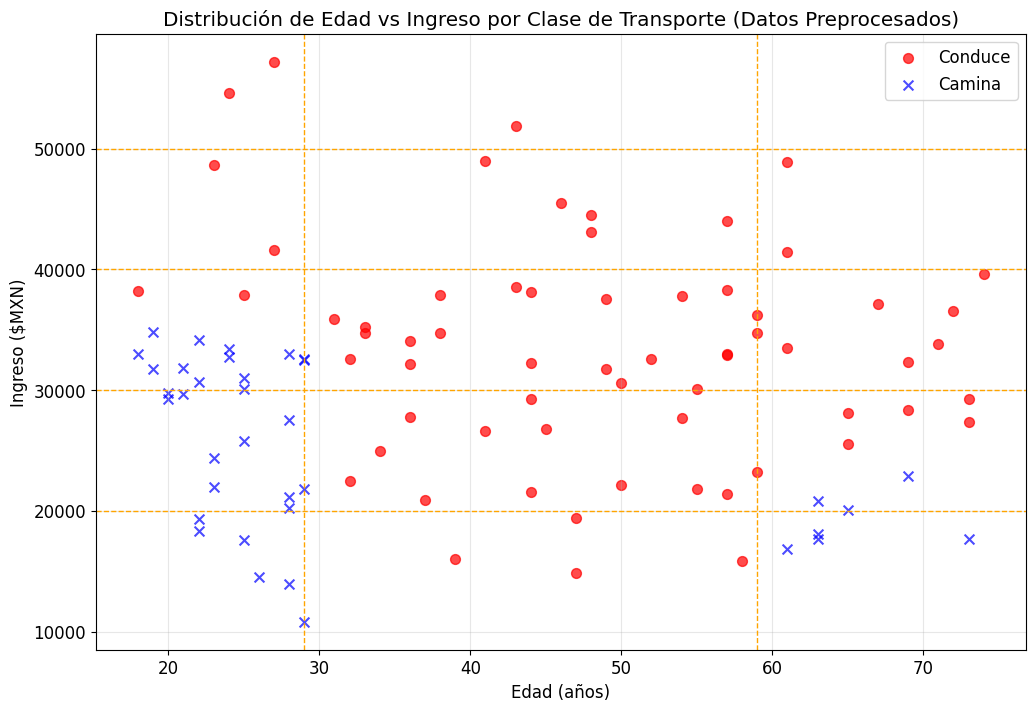

In [9]:
# Gráfico de dispersión: Edad vs Ingreso por Clase con datos preprocesados y líneas de bins
plt.figure(figsize=(12, 8))

# Límites de los bins de edad e ingreso
bins_edad = [18, 29, 59, 75]
bins_ingreso = [10000, 19999, 29999, 39999, 49999, 60000]

# lineas verticales para los bins de edad
for limite in bins_edad[1:-1]: #[1:-1] = excluir el primer y último límite
    plt.axvline(x=limite, color='orange', linestyle='--', linewidth=1)

# lineas horizontales para los bins de ingreso
for limite in bins_ingreso[1:-1]:
    plt.axhline(y=limite, color='orange', linestyle='--', linewidth=1)

# figuras diferentes por clase
marcadores = {'Camina': 'x', 'Conduce': 'o'}
colores = {'Camina': 'blue', 'Conduce': 'red'}

# Usar el DataFrame procesado para graficar
for clase in df_procesado['Clase'].unique():
    datos_clase = df_procesado[df_procesado['Clase'] == clase]
    plt.scatter(
        datos_clase['Edad'],
        datos_clase['Ingreso'],
        label=clase,
        alpha=0.7,
        s=50,
        marker=marcadores[clase],
        color=colores[clase]
    )

plt.xlabel('Edad (años)')
plt.ylabel('Ingreso ($MXN)')
plt.title('Distribución de Edad vs Ingreso por Clase de Transporte (Datos Preprocesados)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
print("=== EJEMPLO PRACTICO DE BINNING ===")

# Tomar algunos ejemplos del dataset
ejemplos = df_procesado.head(5)
for idx, fila in ejemplos.iterrows():
    edad = fila['Edad']
    ingreso = fila['Ingreso']
    edad_bin = fila['Edad_bin']
    ingreso_bin = fila['Ingreso_bin']
    clase = fila['Clase']
    
    nombre_edad = preprocesador.nombres_edad[edad_bin]
    nombre_ingreso = preprocesador.nombres_ingreso[ingreso_bin]
    
    print(f"Persona {idx+1}:")
    print(f"  Edad: {edad} años → Bin {edad_bin} ({nombre_edad})")
    print(f"  Ingreso: ${ingreso:,} → Bin {ingreso_bin} ({nombre_ingreso})")
    print(f"  Clase real: {clase}")
    print()

print("Preprocesamiento completado. Las variables continuas han sido discretizadas.")
print("Ahora podemos proceder a calcular probabilidades usando conteo de frecuencias.")

=== EJEMPLO PRACTICO DE BINNING ===
Persona 1:
  Edad: 57 años → Bin 1 (Adulto (30-59))
  Ingreso: $32,961 → Bin 2 (Medio (30k-39,999k))
  Clase real: Conduce

Persona 2:
  Edad: 29 años → Bin 0 (Joven (18-29))
  Ingreso: $32,610 → Bin 2 (Medio (30k-39,999k))
  Clase real: Camina

Persona 3:
  Edad: 25 años → Bin 0 (Joven (18-29))
  Ingreso: $30,051 → Bin 2 (Medio (30k-39,999k))
  Clase real: Camina

Persona 4:
  Edad: 54 años → Bin 1 (Adulto (30-59))
  Ingreso: $27,654 → Bin 1 (Bajo (20k-29,999k))
  Clase real: Conduce

Persona 5:
  Edad: 58 años → Bin 1 (Adulto (30-59))
  Ingreso: $15,846 → Bin 0 (Muy bajo (10k-19,999k))
  Clase real: Conduce

Preprocesamiento completado. Las variables continuas han sido discretizadas.
Ahora podemos proceder a calcular probabilidades usando conteo de frecuencias.


# =================================================================================


## 5. IMPLEMENTACIÓN DEL CLASIFICADOR BAYESIANO

### 5.1° Probabilidades A Priori = P(C)

Las **probabilidades a priori** representan la probabilidad base de cada clase, sin considerar ninguna característica específica. 

**P(C)** = frecuencia_de_clase / total_de_muestras_clases

Es la probabilidad de que una persona cualquiera (sin saber nada de su edad o ingreso) pertenezca a la clase "Camina" o "Conduce".

In [11]:
from models.clasificador_bayesiano import ClasificadorBayesiano
# inicializar
clasificador = ClasificadorBayesiano()

# Calcular probabilidades a priori con los datos procesados
probabilidades_priori = clasificador.calcular_probabilidades_priori(df_procesado)

# Mostrar
clasificador.mostrar_probabilidades_priori()

Clasificador bayesiano cargado y listo para entrenar.
=== CALCULANDO PROBABILIDADES A PRIORI P(C) ===
Mostrando clases: ['Conduce' 'Camina']

Conteo por clase:
  Conduce: 64 muestras
  Camina: 36 muestras

Probabilidades a priori P(C):
  P(Conduce) = 64/100 = 0.6400
  P(Camina) = 36/100 = 0.3600

=== RESUMEN DE PROBABILIDADES A PRIORI ===
P(Conduce) = 0.6400 (64.0%)
P(Camina) = 0.3600 (36.0%)


### 5.2: Probabilidades Conjuntas P(x|C)

Representan: la probabilidad de que una persona tenga ciertas características (edad e ingreso) dado que ya sabemos a qué clase pertenece (Camina o Conduce).

**P(Edad_bin, Ingreso_bin | Clase)** = Probabilidad de que una persona tenga una combinación específica de edad e ingreso, sabiendo que pertenece a una clase determinada.

**Ejemplo**: P(Edad_bin=0, Ingreso_bin=1 | Camina)
- por ejemplo: Que tan probable es que una persona que **Camina** sea joven (18-29) y tenga ingresos **bajos** (20k-30k)?

**Fórmula**: P(x | C) = frecuencia_de_combinacion(x,C) / total_de_clase_C

In [19]:
# Mostrar tabla de frecuencias cruzadas y conteo absoluto por combinación de bins y clase
import pandas as pd

# Agrupar por Edad_bin, Ingreso_bin y Clase para obtener la frecuencia absoluta
conteo = df_procesado.groupby(['Edad_bin', 'Ingreso_bin', 'Clase']).size().reset_index(name='Frecuencia')

# Pivotear la tabla para mostrar una columna por clase (Camina, Conduce)
tabla_pivot = conteo.pivot_table(index=['Edad_bin', 'Ingreso_bin'], columns='Clase', values='Frecuencia', fill_value=0)

# Mostrar la tabla como en las instrucciones
print("Tabla de frecuencias absolutas por combinación de bins y clase:")
display(tabla_pivot)

# Mostrar el total de ejemplos por clase
print("\nTotal de ejemplos por clase:")
total_por_clase = df_procesado['Clase'].value_counts()
display(total_por_clase)

# Calcular y mostrar la probabilidad empírica P(x|C) para cada combinación
conteo['Total_clase'] = conteo['Clase'].map(total_por_clase)
conteo['P(x|C)'] = conteo['Frecuencia'] / conteo['Total_clase']

# Mostrar tabla final con probabilidades
print("\nTabla de frecuencias y probabilidades empiricas P(x|C):")
display(conteo[['Edad_bin', 'Ingreso_bin', 'Clase', 'Frecuencia', 'P(x|C)']])

Tabla de frecuencias absolutas por combinación de bins y clase:


Clase                 Camina  Conduce
Edad_bin Ingreso_bin                 
0        0               6.0      0.0
         1              10.0      0.0
         2              13.0      2.0
         3               0.0      2.0
         4               0.0      2.0
1        0               0.0      4.0
         1               0.0     13.0
         2               0.0     22.0
         3               0.0      5.0
         4               0.0      1.0
2        0               4.0      0.0
         1               3.0      5.0
         2               0.0      6.0
         3               0.0      2.0


Total de ejemplos por clase:


Clase
Conduce    64
Camina     36
Name: count, dtype: int64


Tabla de frecuencias y probabilidades empiricas P(x|C):


,Edad_bin,Ingreso_bin,Clase,Frecuencia,P(x|C)
0,0,0,Camina,6,0.166667
1,0,1,Camina,10,0.277778
2,0,2,Camina,13,0.361111
3,0,2,Conduce,2,0.031250
4,0,3,Conduce,2,0.031250
5,0,4,Conduce,2,0.031250
6,1,0,Conduce,4,0.062500
7,1,1,Conduce,13,0.203125
8,1,2,Conduce,22,0.343750
9,1,3,Conduce,5,0.078125


In [ ]:
# Calcular probabilidades conjuntas P(x|C)
print("Calculando probabilidades conjuntas...")

# Calcular todas las probabilidades conjuntas
# dentro del metodo aplica la funcion LaPlace
probabilidades_conjuntas = clasificador.calcular_probabilidades_conjuntas(df_procesado)

# Mostrar tabla organizada
clasificador.mostrar_tabla_probabilidades_conjuntas()

Calculando probabilidades conjuntas...
=== CALCULANDO PROBABILIDADES CONJUNTAS P(x|C) ===

--- Clase: Conduce ---
Total de muestras en clase 'Conduce': 64
Combinaciones encontradas: 11
  P(Edad_bin=0, Ingreso_bin=0 | Conduce) = (0+1)/(64+15) = 0.0127
  P(Edad_bin=0, Ingreso_bin=1 | Conduce) = (0+1)/(64+15) = 0.0127
  P(Edad_bin=0, Ingreso_bin=2 | Conduce) = (2+1)/(64+15) = 0.0380
  P(Edad_bin=0, Ingreso_bin=3 | Conduce) = (2+1)/(64+15) = 0.0380
  P(Edad_bin=0, Ingreso_bin=4 | Conduce) = (2+1)/(64+15) = 0.0380
  P(Edad_bin=1, Ingreso_bin=0 | Conduce) = (4+1)/(64+15) = 0.0633
  P(Edad_bin=1, Ingreso_bin=1 | Conduce) = (13+1)/(64+15) = 0.1772
  P(Edad_bin=1, Ingreso_bin=2 | Conduce) = (22+1)/(64+15) = 0.2911
  P(Edad_bin=1, Ingreso_bin=3 | Conduce) = (5+1)/(64+15) = 0.0759
  P(Edad_bin=1, Ingreso_bin=4 | Conduce) = (1+1)/(64+15) = 0.0253
  P(Edad_bin=2, Ingreso_bin=0 | Conduce) = (0+1)/(64+15) = 0.0127
  P(Edad_bin=2, Ingreso_bin=1 | Conduce) = (5+1)/(64+15) = 0.0759
  P(Edad_bin=2, Ingre

In [14]:
# Ejemplo:Supongamos que hay una persona de 21 años con un ingreso de 29000 MXN
# Persona: Edad = 21, Ingreso = 29000
# Queremos: Edad_bin = 0, Ingreso_bin = 1, Clase = 'Camina'

edad_original = 21
ingreso_original = 29000
clase_ejemplo = 'Camina'

# Obtener bins
import pandas as pd
df_temp = pd.DataFrame({'Edad': [edad_original], 'Ingreso': [ingreso_original]})
df_temp_binned = preprocesador.aplicar_binning(df_temp)
edad_bin = int(df_temp_binned['Edad_bin'][0])
ingreso_bin = int(df_temp_binned['Ingreso_bin'][0])

# Calcular frecuencia absoluta para esa combinación y clase
df_filtrado = df_procesado[(df_procesado['Edad_bin'] == edad_bin) & (df_procesado['Ingreso_bin'] == ingreso_bin) & (df_procesado['Clase'] == clase_ejemplo)]
frecuencia = len(df_filtrado)

total_clase = len(df_procesado[df_procesado['Clase'] == clase_ejemplo])

# Probabilidad empírica (sin Laplace)
if total_clase > 0:
    probabilidad = frecuencia / total_clase
else:
    probabilidad = 0

# Mostrar resultado en DataFrame
display(pd.DataFrame({
    'Edad_bin': [edad_bin],
    'Ingreso_bin': [ingreso_bin],
    'Clase': [clase_ejemplo],
    'Frecuencia': [frecuencia],
    'Total_clase': [total_clase],
    'P(x|C)': [probabilidad]
}))

print(f"Ejemplo de calculo:")
print(f"Edad = {edad_original}, Ingreso = {ingreso_original}")
print(f"Edad_bin = {edad_bin}, Ingreso_bin = {ingreso_bin}, Clase = {clase_ejemplo}")
print(f"Frecuencia de la combinación: {frecuencia}")
print(f"Total de ejemplos en la clase '{clase_ejemplo}': {total_clase}")
print(f"P((Edad_bin={edad_bin}, Ingreso_bin={ingreso_bin}) | {clase_ejemplo}) = {frecuencia} / {total_clase} = {probabilidad:.5f}")


,Edad_bin,Ingreso_bin,Clase,Frecuencia,Total_clase,P(x|C)
0,0,1,Camina,10,36,0.277778


Ejemplo de calculo:
Edad = 21, Ingreso = 29000
Edad_bin = 0, Ingreso_bin = 1, Clase = Camina
Frecuencia de la combinación: 10
Total de ejemplos en la clase 'Camina': 36
P((Edad_bin=0, Ingreso_bin=1) | Camina) = 10 / 36 = 0.27778


### 5.3: Probabilidad de la evidencia P(x)
La probabilidad de la evidencia, es la **probabilidad total** de observar una **combinación específica de características** 

por ejemplo, un bin de edad y un bin de ingreso
> sin importar la clase. Se calcula sumando la probabilidad de esa combinación para cada clase, ponderada por la probabilidad a priori de cada clase.

**Fórmula:**
$$
P(x) = \sum_{C} P(x|C) \cdot P(C)
$$

Donde:
- $P(x|C)$ es la probabilidad conjunta de la combinación de características dado cada clase.
- $P(C)$ es la probabilidad a priori de la clase.

Esta probabilidad es necesaria para aplicar el Teorema de Bayes y obtener la probabilidad posterior de cada clase.

A continuación se muestra el código para calcular la probabilidad de la evidencia para una combinación específica de bins.

In [15]:
# Calcular la probabilidad de la evidencia para una combinación de bins ejemplo
edad_bin_ejemplo = 0  # Joven (18-29)
ingreso_bin_ejemplo = 1  # Bajo (20k-30k)

# Usar el método del clasificador para calcular P(x)
prob_evidencia = clasificador.calcular_probabilidad_evidencia(edad_bin_ejemplo, ingreso_bin_ejemplo)

print(f'Probabilidad de la evidencia para Edad_bin={edad_bin_ejemplo}, Ingreso_bin={ingreso_bin_ejemplo}:')
print(f'P(x) = {prob_evidencia:.4f}')


=== CALCULO DE EVIDENCIA P(x) PARA (Edad_bin=0, Ingreso_bin=1) ===
  P(x|Conduce) = 0.0127  |  P(Conduce) = 0.6400  |  Producto = 0.0081
  P(x|Camina) = 0.2157  |  P(Camina) = 0.3600  |  Producto = 0.0776

  P(x) = 0.0857

Probabilidad de la evidencia para Edad_bin=0, Ingreso_bin=1:
P(x) = 0.0857


### 6: Predicción con el Teorema de Bayes
En esta sección aplicamos el Teorema de Bayes para predecir la clase de un individuo a partir de sus características (edad_bin, ingreso_bin).
El clasificador calcula la probabilidad posterior de cada clase y asigna la clase con mayor probabilidad.

**Fórmula:**
$$
P(C|x) = \frac{P(x|C) \cdot P(C)}{P(x)}
$$

Donde:
- $P(C|x)$ es la probabilidad posterior de la clase dada la evidencia.
- $P(x|C)$ es la probabilidad conjunta de la combinación de características dado la clase.
- $P(C)$ es la probabilidad a priori de la clase.
- $P(x)$ es la probabilidad de la evidencia.

El modelo predice la clase con mayor $P(C|x)$ (criterio de máximo a posteriori).
A continuación se muestra un ejemplo de predicción paso a paso.

In [ ]:
# 3. Implementar clase de preduccion (Clase .predict)
# Ejemplo de predicción paso a paso usando el método del clasificador
edad_bin_ejemplo = 0  # Joven (18-29)
ingreso_bin_ejemplo = 1  # Bajo (20k-30k)

clase_predicha, probabilidad = clasificador.predecir_clase(edad_bin_ejemplo, ingreso_bin_ejemplo)
print(f"Clase predicha para Edad_bin={edad_bin_ejemplo}, Ingreso_bin={ingreso_bin_ejemplo}: {clase_predicha}")
print(f"Probabilidad posterior: {probabilidad:.4f}")


=== PREDICCIÓN DE CLASE PARA (Edad_bin=0, Ingreso_bin=1) ===

=== CALCULO DE EVIDENCIA P(x) PARA (Edad_bin=0, Ingreso_bin=1) ===
  P(x|Conduce) = 0.0127  |  P(Conduce) = 0.6400  |  Producto = 0.0081
  P(x|Camina) = 0.2157  |  P(Camina) = 0.3600  |  Producto = 0.0776

  P(x) = 0.0857

  P(Conduce|x) = [ 0.0127 * 0.6400 ] / 0.0857 = 0.0945
  P(Camina|x) = [ 0.2157 * 0.3600 ] / 0.0857 = 0.9055

Clase predicha: Camina con probabilidad 0.9055

Clase predicha para Edad_bin=0, Ingreso_bin=1: Camina
Probabilidad posterior: 0.9055


### 7: Matriz de confusión, precisión, sensibilidad y especificidad

En esta sección evaluaremos el desempeño del clasificador bayesiano utilizando métricas manuales:
- **Matriz de confusión**: muestra cuántos ejemplos fueron clasificados correctamente o incorrectamente para cada clase.
- **Precisión**: proporción de aciertos sobre el total de predicciones.
- **Sensibilidad (Recall)**: capacidad del modelo para identificar correctamente los positivos reales (verdaderos positivos).
- **Especificidad**: capacidad del modelo para identificar correctamente los negativos reales (verdaderos negativos).

**Nota:** Todo el cálculo se realiza manualmente, sin librerías externas de machine learning, siguiendo la lógica explicada en clase.

A continuación, se muestra el código para calcular y mostrar estas métricas paso a paso.

In [ ]:
# Evaluación del modelo: matriz de confusión, precisión, sensibilidad y especificidad
import sys
sys.path.append('src')
from utils.metricas import sensibilidad, especificidad
from models.clasificador_bayesiano import ClasificadorBayesiano
import numpy as np

# Mezclar el dataset y separar conjunto de prueba (20%) y entrenamiento (80%)
df_mezclado = df_procesado.sample(frac=1, random_state=42).reset_index(drop=True)
tamano_prueba = int(len(df_mezclado) * 0.2)
df_prueba = df_mezclado.iloc[:tamano_prueba]
df_entrenamiento = df_mezclado.iloc[tamano_prueba:]

# Entrenar el clasificador con el conjunto de entrenamiento
clasificador = ClasificadorBayesiano()
clasificador.calcular_probabilidades_priori(df_entrenamiento)
clasificador.calcular_probabilidades_conjuntas(df_entrenamiento)

# Inicializar matriz de confusión manual (2x2)
matriz = np.zeros((2,2), dtype=int)
clases = ['Camina', 'Conduce']

# Realizar predicciones sobre el conjunto de prueba
y_reales = []
y_predichos = []
for _, fila in df_prueba.iterrows():
    edad_bin = fila['Edad_bin']
    ingreso_bin = fila['Ingreso_bin']
    clase_real = fila['Clase']
    clase_predicha, _ = clasificador.predecir_clase(edad_bin, ingreso_bin)
    y_reales.append(clase_real)
    y_predichos.append(clase_predicha)
    # Actualizar matriz de confusión
    i = clases.index(clase_real)
    j = clases.index(clase_predicha)
    matriz[i][j] += 1

# Mostrar matriz de confusión
print('Matriz de confusión (manual):')
print('           Predicho')
print('           Camina  Conduce')
print(f'Real Camina   {matriz[0][0]:6}  {matriz[0][1]:7}')
print(f'Real Conduce  {matriz[1][0]:6}  {matriz[1][1]:7}')

# Calcular precisión general
precision = np.trace(matriz) / np.sum(matriz)
print(f'Precisión general: {precision:.4f}')

# Calcular sensibilidad y especificidad para cada clase
#camina
VP_camina = matriz[0][0] # Verdaderos Positivos
FN_camina = matriz[0][1] # Falsos Negativos
VN_camina = matriz[1][1] # Verdaderos Negativos
FP_camina = matriz[1][0] # Falsos Positivos

sens_camina = sensibilidad(VP_camina, FN_camina)
esp_camina = especificidad(VN_camina, FP_camina)

#conduce
VP_conduce = matriz[1][1] # Verdaderos Positivos
FN_conduce = matriz[1][0] # Falsos Negativos
VN_conduce = matriz[0][0] # Verdaderos Negativos
FP_conduce = matriz[0][1] # Falsos Positivos

sens_conduce = sensibilidad(VP_conduce, FN_conduce)
esp_conduce = especificidad(VN_conduce, FP_conduce)

print(f'Sensibilidad Camina: {sens_camina:.4f}')
print(f'Especificidad Camina: {esp_camina:.4f}')
print(f'Sensibilidad Conduce: {sens_conduce:.4f}')
print(f'Especificidad Conduce: {esp_conduce:.4f}')

Clasificador bayesiano cargado y listo para entrenar.
=== CALCULANDO PROBABILIDADES A PRIORI P(C) ===
Mostrando clases: ['Conduce' 'Camina']

Conteo por clase:
  Conduce: 49 muestras
  Camina: 31 muestras

Probabilidades a priori P(C):
  P(Conduce) = 49/80 = 0.6125
  P(Camina) = 31/80 = 0.3875
=== CALCULANDO PROBABILIDADES CONJUNTAS P(x|C) ===

--- Clase: Conduce ---
Total de muestras en clase 'Conduce': 49
Combinaciones encontradas: 10
  P(Edad_bin=0, Ingreso_bin=0 | Conduce) = (0+1)/(49+15) = 0.0156
  P(Edad_bin=0, Ingreso_bin=1 | Conduce) = (0+1)/(49+15) = 0.0156
  P(Edad_bin=0, Ingreso_bin=2 | Conduce) = (1+1)/(49+15) = 0.0312
  P(Edad_bin=0, Ingreso_bin=3 | Conduce) = (2+1)/(49+15) = 0.0469
  P(Edad_bin=0, Ingreso_bin=4 | Conduce) = (1+1)/(49+15) = 0.0312
  P(Edad_bin=1, Ingreso_bin=0 | Conduce) = (3+1)/(49+15) = 0.0625
  P(Edad_bin=1, Ingreso_bin=1 | Conduce) = (11+1)/(49+15) = 0.1875
  P(Edad_bin=1, Ingreso_bin=2 | Conduce) = (17+1)/(49+15) = 0.2812
  P(Edad_bin=1, Ingreso_bin=3